# 1. Introduction

Baltimore, Maryland is infamous for its significantly high crime rate. Violent crime spiked in 2015 after the death of Freddie Gray, which touched off riots and has resulted in the huge increasing in murders. Baltimore recorded 344 homicides in 2015. To put that in perspective, New York City, a city with a 2015 population of 8,491,079, recorded a total of 339 homicides in 2015. Baltimore had a 2015 population of 621,849; which means that in 2015 Baltimore had a homicide rate 14 times higher than New York City's.

However, Baltimore is also a tourism city with beautiful harbor and delicious seafood. The city hosted about 25 million visitors a year, which is about 8% of the population in U.S. In order to give a better guidance to the visitors, this project will focus on the analysis crime in Baltimore and will find out the safest area in Baltimore with view suggestions according to the Foursquare location data.

# 2. Data Aquisition and Data Cleaning

## 2.1 Data Aquisition

The data for this project are two sorces. The first dataset is the [crime in Baltimore for 2012-2017](https://www.kaggle.com/sohier/crime-in-baltimore/kernels) from [Kaggle](https://www.kaggle.com/). This data presents all the crimes recorded from 2012 to 2017 in Baltimore. This data set contains the following __columns__:

* **CrimeDate**: Indicate the crime data in form of MM/DD/YYYY
* **CrimeTime**: Indicate the crime time in form of HH/MM/SS
* **CrimeCode**: Indicate the crime code of the crime event
* **Location**: Indicate the street location of the crime event
* **Description**: Indicate the type of crime, eg: Robbery/Shooting...
* **Inside/Outside**: Indicate whether the crime event happend inside or outside
* **Weapon**: Indicate the weapon used for the crime event
* **Post**: Not clear
* **District**: Indicate the district of the crime happened
* **Neighborhood**: Indicate the neighborhood of the crime happened
* **Longitude**: Coordinates Information
* **Latitude**: Coordinates Information
* **Location 1**: In form of (Latitude, Longitude)
* **Premise**: Indicate the type of location where the crime event happened.
* **Total incidents**: Indicate the number of incidents under this record (usually equals to 1)

The second dataset is the Foursquare location data which contains the venue information grouped by neighborhood. This data set contains the following **columns**:

* **Neighborhood**: The name of neighborhood
* **Neighborhood Latitude**: Coordinates information
* **Neighborhood Longitude**: Coordinated information
* **Venue**: The name of venue
* **Venue Latitude**: Venue coordinates information
* **Venue Longitude**: Venue coordinates information
* **Venue Category**: The type of venue

## 2.2 Data Cleaning

In [186]:
import pandas as pd
import numpy as np
import folium
import requests

The Baltimore crime data from 2012 to 2017 is imported as _df_

In [4]:
df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
df.head(10)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1
5,09/02/2017,22:00:00,5A,CHERRYCREST RD,BURGLARY,I,NaN,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,"(39.2486700000, -76.6213100000)",ROW/TOWNHO,1
6,09/02/2017,21:15:00,1F,3400 HARMONY CT,HOMICIDE,Outside,FIREARM,232.0,SOUTHEASTERN,Canton,-76.56827,39.28202,"(39.2820200000, -76.5682700000)",Street,1
7,09/02/2017,21:35:00,3B,400 W LANVALE ST,ROBBERY - STREET,O,NaN,123.0,CENTRAL,Upton,-76.62789,39.30254,"(39.3025400000, -76.6278900000)",STREET,1
8,09/02/2017,21:00:00,4C,2300 LYNDHURST AVE,AGG. ASSAULT,O,OTHER,641.0,NORTHWESTERN,Windsor Hills,-76.68365,39.31370,"(39.3137000000, -76.6836500000)",STREET,1
9,09/02/2017,21:00:00,4E,1200 N ELLWOOD AVE,COMMON ASSAULT,I,HANDS,332.0,EASTERN,Berea,-76.57419,39.30551,"(39.3055100000, -76.5741900000)",ROW/TOWNHO,1


Check the shape of the dataframe

In [3]:
df.shape

(276529, 15)

Drop the columns that are not important for this project

In [58]:
df_bal = df.drop(['CrimeCode','Inside/Outside','Post','Location 1', 'Premise',  'Total Incidents'], axis = 1)
df_bal.head()

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
0,09/02/2017,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951
1,09/02/2017,23:00:00,800 NEWINGTON AVE,AUTO THEFT,NaN,CENTRAL,Reservoir Hill,-76.63217,39.31360
2,09/02/2017,22:53:00,600 RADNOR AV,SHOOTING,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768
3,09/02/2017,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315
4,09/02/2017,22:31:00,100 LIGHT ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown West,-76.61365,39.28756


One thing noticed in the weapon cloumn is that for crime events with unidentified weapon, the description has both 'NaN' and 'Other'. 'NaN' means no weapon, and 'OTHER' means other weapon. See if we have any other descriptions of weapons.

In [59]:
df_bal['Weapon'].unique()

array(['KNIFE', nan, 'FIREARM', 'OTHER', 'HANDS'], dtype=object)

In [60]:
df_bal['Weapon'].fillna('NO WEAPON', inplace = True)
df_bal.head()

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
0,09/02/2017,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951
1,09/02/2017,23:00:00,800 NEWINGTON AVE,AUTO THEFT,NO WEAPON,CENTRAL,Reservoir Hill,-76.63217,39.31360
2,09/02/2017,22:53:00,600 RADNOR AV,SHOOTING,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768
3,09/02/2017,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315
4,09/02/2017,22:31:00,100 LIGHT ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown West,-76.61365,39.28756


Now let's check the unique items of weapon again to see if we successfully replace all the _NaN_ to _No WEAPON_

In [61]:
df_bal['Weapon'].unique()

array(['KNIFE', 'NO WEAPON', 'FIREARM', 'OTHER', 'HANDS'], dtype=object)

In [62]:
#Check the finalized data
df_bal.head(10)

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
0,09/02/2017,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951
1,09/02/2017,23:00:00,800 NEWINGTON AVE,AUTO THEFT,NO WEAPON,CENTRAL,Reservoir Hill,-76.63217,39.31360
2,09/02/2017,22:53:00,600 RADNOR AV,SHOOTING,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768
3,09/02/2017,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315
4,09/02/2017,22:31:00,100 LIGHT ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown West,-76.61365,39.28756
5,09/02/2017,22:00:00,CHERRYCREST RD,BURGLARY,NO WEAPON,SOUTHERN,Cherry Hill,-76.62131,39.24867
6,09/02/2017,21:15:00,3400 HARMONY CT,HOMICIDE,FIREARM,SOUTHEASTERN,Canton,-76.56827,39.28202
7,09/02/2017,21:35:00,400 W LANVALE ST,ROBBERY - STREET,NO WEAPON,CENTRAL,Upton,-76.62789,39.30254
8,09/02/2017,21:00:00,2300 LYNDHURST AVE,AGG. ASSAULT,OTHER,NORTHWESTERN,Windsor Hills,-76.68365,39.31370
9,09/02/2017,21:00:00,1200 N ELLWOOD AVE,COMMON ASSAULT,HANDS,EASTERN,Berea,-76.57419,39.30551


Drop the rows without the coordinates information

In [224]:
df_bal.dropna(subset = ['Longitude', 'Latitude'], axis = 0, inplace = True)
df_bal.head()

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
0,09/02/2017,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951
1,09/02/2017,23:00:00,800 NEWINGTON AVE,AUTO THEFT,NO WEAPON,CENTRAL,Reservoir Hill,-76.63217,39.31360
2,09/02/2017,22:53:00,600 RADNOR AV,SHOOTING,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768
3,09/02/2017,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315
4,09/02/2017,22:31:00,100 LIGHT ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown West,-76.61365,39.28756


Now from the _df_bal_ dataset, we have all the necessary items we need for analysis the crime events in Baltimore. Later, based on the visulaization of the crime data, we will have an idea of the area with the lowest crime rate. Then we will have to use the **FOURSQUARE** data to analyse the attractions in that area and give suggestions to the toutists.

# 3. Methodology

## 3.1 Explore the crime data in Baltimore

### 3.1.1 Visualize the crime data in Baltimore

To have a intuitive feeling about the crime event in Baltimore, we will use the folium map the visualize the crime data. However, due to the large size of the dataset, only 1000 crime events in 2017 will be plotted into the map.

In [88]:
df_bal.dtypes

CrimeDate        object
CrimeTime        object
Location         object
Description      object
Weapon           object
District         object
Neighborhood     object
Longitude       float64
Latitude        float64
dtype: object

In [84]:
df_bal_2017 = df_bal.head(1000)
df_bal_2017.shape

(1000, 9)

Now the number of cases is limited to 1000

In [78]:
#Baltimore latitude and longitude values
latitude = 39.3
longitude = -76.6

In [89]:
# create map and display it
bal_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
bal_map

In [85]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(df_bal_2017.Latitude, df_bal_2017.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# add incidents to map
bal_map.add_child(incidents)

As we can see from the map, most of the crime events happened in downtown Baltimore which is neat the harbor area.

### 3.1.2 Crime events in different districts

In [90]:
df_bal.head()

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
0,09/02/2017,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951
1,09/02/2017,23:00:00,800 NEWINGTON AVE,AUTO THEFT,NO WEAPON,CENTRAL,Reservoir Hill,-76.63217,39.31360
2,09/02/2017,22:53:00,600 RADNOR AV,SHOOTING,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768
3,09/02/2017,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315
4,09/02/2017,22:31:00,100 LIGHT ST,COMMON ASSAULT,HANDS,CENTRAL,Downtown West,-76.61365,39.28756


In [107]:
df_bal_dis = df_bal.groupby('District').count()
df_bal_dis.reset_index(inplace = True)
df_bal_dis.drop(['CrimeTime','Location','Description','Weapon', 'Neighborhood',  'Longitude', 'Latitude'], axis = 1, inplace = True)
df_bal_dis.rename(columns={'CrimeDate': 'Total'}, inplace=True)
df_bal_dis

,District,Total
0,CENTRAL,31397
1,EASTERN,23465
2,NORTHEASTERN,42709
3,NORTHERN,31273
4,NORTHWESTERN,27895
5,SOUTHEASTERN,38023
6,SOUTHERN,31616
7,SOUTHWESTERN,25905
8,WESTERN,22039


Sort the districts according to the total crime number

In [109]:
df_bal_dis.sort_values(by = "Total", ascending = False, axis = 0, inplace = True)
df_bal_dis

,District,Total
2,NORTHEASTERN,42709
5,SOUTHEASTERN,38023
6,SOUTHERN,31616
0,CENTRAL,31397
3,NORTHERN,31273
4,NORTHWESTERN,27895
7,SOUTHWESTERN,25905
1,EASTERN,23465
8,WESTERN,22039


[]

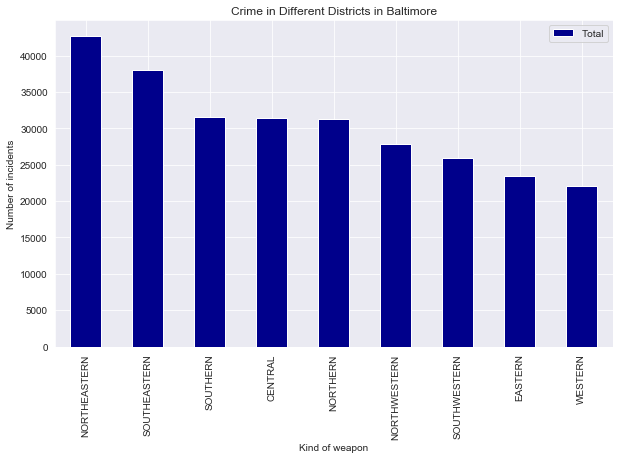

In [110]:
import matplotlib.pyplot as plt
df_bal_dis.plot(kind='bar', x='District', y='Total', figsize=(10, 6), color='darkblue')
plt.title('Crime in Different Districts in Baltimore')
plt.xlabel('Kind of weapon')
plt.ylabel('Number of incidents')
plt.plot()

According to the plot, _NORTHEASTERN_ has the highest crime events from 2012 to 2017, while _WESTERN_ has the lowest crime evetns. Therefore, _WASTERN_ will be considered as the most safe area in Baltimore.

### 3.1.3 The most common crimes in Baltimore

[]

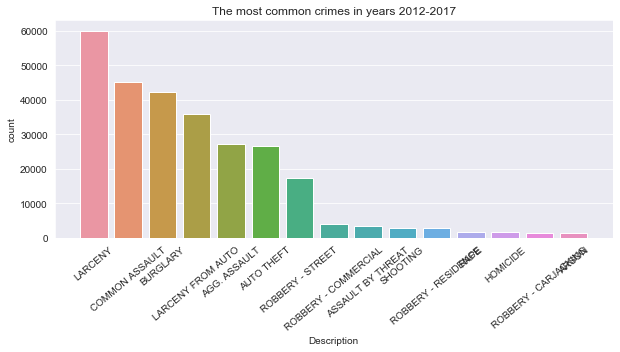

In [225]:
plt.figure(figsize=(10,4))

plt.title('The most common crimes in years 2012-2017')
sns.countplot(x='Description', data=df_bal, order = df_bal['Description'].value_counts().index, )
plt.xticks(rotation=40)
plt.plot()

Larceny is the most frequent kind of crime

## 3.2 Modeling

As a conclusion in 3.1.2, _WESTERN_ is the most safe area in Baltimore. Therefore, all the neighborhood in _WESTERN_ will be listed in this section. We can find all the venues within a 500 meter radius of each neighborhood by connecting to the Foursquare API. This gives us a json file containing all the venues in each neighborhood which is converted to a pandas dataframe. This dataframe contains all the venues along with their coordinates and category.

In [138]:
#only use the data within WESTERN district in df_bal
df_bal_wes = df_bal[df_bal['District'] == 'WESTERN']
df_bal_wes.head()

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
22,09/02/2017,16:00:00,2000 N BENTALOU ST,AGG. ASSAULT,OTHER,WESTERN,Mondawmin,-76.65422,39.31091
37,09/02/2017,09:35:00,2500 PENNSYLVANIA AVE,LARCENY,NO WEAPON,WESTERN,Penn North,-76.64277,39.31033
40,09/02/2017,08:30:00,600 N CARROLLTON AVE,ROBBERY - STREET,FIREARM,WESTERN,Harlem Park,-76.63715,39.29567
70,09/01/2017,23:48:00,2000 W BALTIMORE ST,ROBBERY - STREET,NO WEAPON,WESTERN,Penrose/Fayette Street Ou,-76.64888,39.28810
78,09/01/2017,22:00:00,300 N FREMONT AVE,ARSON,NO WEAPON,WESTERN,Poppleton,-76.63103,39.29278


In [139]:
df_bal_wes[df_bal_wes['Neighborhood'] == 'University Of Maryland']

,CrimeDate,CrimeTime,Location,Description,Weapon,District,Neighborhood,Longitude,Latitude
128528,01/25/2015,20:00:00,700 E BALTIMORE ST,LARCENY FROM AUTO,NO WEAPON,WESTERN,University Of Maryland,-76.62694,39.28909
133120,12/17/2014,08:30:00,700 W BALTIMORE ST,ASSAULT BY THREAT,NO WEAPON,WESTERN,University Of Maryland,-76.62694,39.28909
189511,10/05/2013,01:00:00,700 E BALTIMORE ST,AUTO THEFT,NO WEAPON,WESTERN,University Of Maryland,-76.62694,39.28909


In [179]:
#check the unique neighborhood in WESTERN and store into a list named wes_nei
wes_nei = df_bal_wes['Neighborhood'].unique().tolist()
wes_nei
lat = [39.318, 39.309, 39.296, 39.289, 39.295, 39.307, 39.305, 39.294, 39.313, 39.293, 39.318, 39.308, 39.288,  39.286, 39.265, 39.309, 39.297, 39.310, 39.313, 39.288, 39.300,39.289, 39.295, 39.306, 39.288, 39.289 ]
long = [-76.659, -76.644, -76.642, -76.654, -76.617, -76.655, -76.637, -76.653, -76.660, -76.651, -76.651, -76.651,-76.639, -76.640, -76.598, -76.671, -76.656, -76.640,-76.639, -76.650, -76.633, -76.638, -76.632, -76.633, -76.654, -76.627]

In [182]:
df_wes = pd.DataFrame(list(zip(wes_nei, lat, long)), columns = ['Neighborhood', 'Latitude', 'Longitude'])
df_wes

,Neighborhood,Latitude,Longitude
0,Mondawmin,39.318,-76.659
1,Penn North,39.309,-76.644
2,Harlem Park,39.296,-76.642
3,Penrose/Fayette Street Ou,39.289,-76.654
4,Poppleton,39.295,-76.617
5,Bridgeview/Greenlawn,39.307,-76.655
6,Coppin Heights/Ash-Co-Eas,39.305,-76.637
7,Sandtown-Winchester,39.294,-76.653
8,Rosemont Homeowners/Tenan,39.313,-76.660
9,Panway/Braddish Avenue,39.293,-76.651


API Information

In [120]:
CLIENT_ID = '0LSILXCVEEAJ2WQJIJLYJEQNU2R1RSBVWQ3D5ZA33UCCKH1N' # your Foursquare ID
CLIENT_SECRET = 'JSQURIN25ILBUT00XZLYTLX0ZBXEQC0ZANWT4RUX3MGMZESU' # your Foursquare Secret
VERSION = '20200404'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0LSILXCVEEAJ2WQJIJLYJEQNU2R1RSBVWQ3D5ZA33UCCKH1N
CLIENT_SECRET:JSQURIN25ILBUT00XZLYTLX0ZBXEQC0ZANWT4RUX3MGMZESU


Define a function to obtain the venue information in all neighborhood in Baltimore.

In [187]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now use the function on each neighborhood of Baltimore and create a new dataframe called _bal__venues_

In [188]:
bal_venues = getNearbyVenues(names = df_wes['Neighborhood'],
                                   latitudes=df_wes['Latitude'],
                                   longitudes=df_wes['Longitude']
                                  )


In [192]:
bal_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mondawmin,39.318,-76.659,Mamma Lucia,39.317113,-76.655321,Pizza Place
1,Mondawmin,39.318,-76.659,A&D Buffalo's,39.317732,-76.653998,Restaurant
2,Mondawmin,39.318,-76.659,Ross Dress for Less,39.316668,-76.658233,Clothing Store
3,Mondawmin,39.318,-76.659,Cinnabon,39.317104,-76.654277,Bakery
4,Mondawmin,39.318,-76.659,Family Dollar,39.317019,-76.658048,Discount Store


In [193]:
bal_venues.shape

(359, 7)

Let's check how many venues were returned for each neighborhood

In [194]:
bal_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Boyd-Booth,10,10,10,10,10,10
Bridgeview/Greenlawn,5,5,5,5,5,5
Coppin Heights/Ash-Co-Eas,9,9,9,9,9,9
Druid Heights,11,11,11,11,11,11
Easterwood,15,15,15,15,15,15
Evergreen Lawn,15,15,15,15,15,15
Franklin Square,20,20,20,20,20,20
Harlem Park,7,7,7,7,7,7
Heritage Crossing,10,10,10,10,10,10


In [196]:
print('There are {} uniques categories.'.format(len(bal_venues['Venue Category'].unique())))

There are 112 uniques categories.


In [197]:
# one hot encoding
bal_onehot = pd.get_dummies(bal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bal_onehot['Neighborhood'] = bal_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bal_onehot.columns[-1]] + list(bal_onehot.columns[:-1])
bal_onehot = bal_onehot[fixed_columns]

bal_onehot.head()

,Neighborhood,ATM,American Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Sporting Goods Shop,Supermarket,Theater,Track Stadium,Train,Train Station,Video Game Store,Wine Shop,Wings Joint,Women's Store
0,Mondawmin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mondawmin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mondawmin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mondawmin,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mondawmin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
bal_onehot.shape

(359, 113)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [199]:
bal_grouped = bal_onehot.groupby('Neighborhood').mean().reset_index()
bal_grouped

,Neighborhood,ATM,American Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Sporting Goods Shop,Supermarket,Theater,Track Stadium,Train,Train Station,Video Game Store,Wine Shop,Wings Joint,Women's Store
0,Boyd-Booth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bridgeview/Greenlawn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Coppin Heights/Ash-Co-Eas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000
3,Druid Heights,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Easterwood,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Evergreen Lawn,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Franklin Square,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000
7,Harlem Park,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Heritage Crossing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
9,Hollins Market,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [201]:
bal_grouped.shape

(26, 113)

 Let's print each neighborhood along with the top 5 most common venues

In [202]:
num_top_venues = 5

for hood in bal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bal_grouped[bal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Boyd-Booth----
            venue  freq
0   Grocery Store   0.3
1          Market   0.1
2             Bar   0.1
3            Park   0.1
4  Discount Store   0.1


----Bridgeview/Greenlawn----
                     venue  freq
0        Convenience Store   0.2
1               Playground   0.2
2                 Bus Stop   0.2
3  New American Restaurant   0.2
4           Breakfast Spot   0.2


----Coppin Heights/Ash-Co-Eas----
                  venue  freq
0  Gym / Fitness Center  0.11
1   Fried Chicken Joint  0.11
2        Discount Store  0.11
3    Chinese Restaurant  0.11
4                  Café  0.11


----Druid Heights----
                venue  freq
0                 ATM  0.09
1    Basketball Court  0.09
2  Chinese Restaurant  0.09
3                Café  0.09
4    Business Service  0.09


----Easterwood----
                 venue  freq
0          Pizza Place  0.13
1   Chinese Restaurant  0.13
2        Shopping Mall  0.07
3  American Restaurant  0.07
4                  Gym  0.07


---

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [203]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [205]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bal_grouped['Neighborhood']

for ind in np.arange(bal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boyd-Booth,Grocery Store,Bar,Community Center,Market,Discount Store,Roller Rink,Sculpture Garden,Park,Flower Shop,Department Store
1,Bridgeview/Greenlawn,New American Restaurant,Convenience Store,Playground,Bus Stop,Breakfast Spot,Women's Store,College Bookstore,Community Center,Construction & Landscaping,Cruise
2,Coppin Heights/Ash-Co-Eas,Fried Chicken Joint,Wings Joint,Gym / Fitness Center,Market,Discount Store,Bakery,Roller Rink,Chinese Restaurant,Café,Deli / Bodega
3,Druid Heights,ATM,Café,Metro Station,Bookstore,Jazz Club,Basketball Court,Flower Shop,Business Service,Chinese Restaurant,Fried Chicken Joint
4,Easterwood,Chinese Restaurant,Pizza Place,Gym,Shopping Mall,History Museum,Discount Store,Market,Coffee Shop,Clothing Store,Plaza


Run *k*-means to cluster the neighborhood into 5 clusters.

In [207]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

bal_grouped_clustering = bal_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bal_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 3, 0, 3, 0, 3, 0, 3, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [213]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bal_merge = df_wes

bal_merge = bal_merge.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bal_merge.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mondawmin,39.318,-76.659,3,Women's Store,Shopping Mall,Restaurant,Shoe Store,Clothing Store,Sandwich Place,Drugstore,Kids Store,Discount Store,Fast Food Restaurant
1,Penn North,39.309,-76.644,0,Sandwich Place,Liquor Store,Health & Beauty Service,Pharmacy,Chinese Restaurant,Bookstore,Business Service,Deli / Bodega,Jazz Club,Department Store
2,Harlem Park,39.296,-76.642,0,Playground,American Restaurant,Coffee Shop,Asian Restaurant,Pharmacy,Bus Stop,Bar,Women's Store,Discount Store,Department Store
3,Penrose/Fayette Street Ou,39.289,-76.654,1,Intersection,Pizza Place,Pharmacy,Discount Store,Dive Bar,Convenience Store,Farmers Market,Restaurant,Train,Train Station
4,Poppleton,39.295,-76.617,3,Restaurant,Non-Profit,Peruvian Restaurant,Lounge,Burger Joint,Italian Restaurant,Pizza Place,Deli / Bodega,Park,Sandwich Place


In [218]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bal_merge['Latitude'], bal_merge['Longitude'], bal_merge['Neighborhood'], bal_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [219]:
bal_merge.loc[bal_merge['Cluster Labels'] == 0, bal_merge.columns[[1] + list(range(5, bal_merge.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,39.309,Liquor Store,Health & Beauty Service,Pharmacy,Chinese Restaurant,Bookstore,Business Service,Deli / Bodega,Jazz Club,Department Store
2,39.296,American Restaurant,Coffee Shop,Asian Restaurant,Pharmacy,Bus Stop,Bar,Women's Store,Discount Store,Department Store
5,39.307,Convenience Store,Playground,Bus Stop,Breakfast Spot,Women's Store,College Bookstore,Community Center,Construction & Landscaping,Cruise
14,39.265,Food Truck,Shopping Mall,Buffet,Pier,Brewery,Intersection,Plaza,Donut Shop,Juice Bar
17,39.310,Bookstore,Park,Metro Station,Chinese Restaurant,Pharmacy,Café,Business Service,Plaza,Jazz Club
18,39.313,Café,Metro Station,Bookstore,Jazz Club,Basketball Court,Flower Shop,Business Service,Chinese Restaurant,Fried Chicken Joint
19,39.288,Intersection,Breakfast Spot,Discount Store,Spa,Boutique,Fried Chicken Joint,Pharmacy,Convenience Store,Cruise
24,39.288,Fried Chicken Joint,Fast Food Restaurant,Breakfast Spot,Restaurant,Dive Bar,Discount Store,Spa,Boutique,Convenience Store
25,39.289,Intersection,Museum,Boarding House,American Restaurant,Nightclub,Bus Stop,College Bookstore,Coffee Shop,Convenience Store


Cluster 2

In [220]:
bal_merge.loc[bal_merge['Cluster Labels'] == 1, bal_merge.columns[[1] + list(range(5, bal_merge.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,39.289,Pizza Place,Pharmacy,Discount Store,Dive Bar,Convenience Store,Farmers Market,Restaurant,Train,Train Station
7,39.294,Fast Food Restaurant,Southern / Soul Food Restaurant,Dive Bar,Pizza Place,Farmers Market,Bar,Liquor Store,Fried Chicken Joint,Train
9,39.293,Fast Food Restaurant,Pharmacy,Dive Bar,Intersection,Farmers Market,Bar,Southern / Soul Food Restaurant,Liquor Store,Train
16,39.297,Pharmacy,Liquor Store,Furniture / Home Store,Fried Chicken Joint,Convenience Store,Bar,Women's Store,Discount Store,Department Store


Cluster 3

In [221]:
bal_merge.loc[bal_merge['Cluster Labels'] == 2, bal_merge.columns[[1] + list(range(5, bal_merge.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,39.308,Bus Stop,Fried Chicken Joint,Deli / Bodega,Women's Store,Drugstore,Community Center,Convenience Store,Cruise,Cycle Studio


Cluster 4

In [222]:
bal_merge.loc[bal_merge['Cluster Labels'] == 3, bal_merge.columns[[1] + list(range(5, bal_merge.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,39.318,Shopping Mall,Restaurant,Shoe Store,Clothing Store,Sandwich Place,Drugstore,Kids Store,Discount Store,Fast Food Restaurant
4,39.295,Non-Profit,Peruvian Restaurant,Lounge,Burger Joint,Italian Restaurant,Pizza Place,Deli / Bodega,Park,Sandwich Place
6,39.305,Wings Joint,Gym / Fitness Center,Market,Discount Store,Bakery,Roller Rink,Chinese Restaurant,Café,Deli / Bodega
8,39.313,Locksmith,Track Stadium,Fast Food Restaurant,Discount Store,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cruise
10,39.318,Restaurant,Shoe Store,Mobile Phone Shop,Women's Store,Pizza Place,Bus Station,Bus Stop,Nail Salon,Convenience Store
12,39.288,Pizza Place,Gym,Shopping Mall,History Museum,Discount Store,Market,Coffee Shop,Clothing Store,Plaza
13,39.286,Gym,Shoe Store,Clothing Store,Chinese Restaurant,Market,Peruvian Restaurant,Liquor Store,Plaza,Rental Car Location
15,39.309,Drugstore,Gas Station,Grocery Store,Fried Chicken Joint,Bakery,Bank,Pizza Place,Fast Food Restaurant,Women's Store
21,39.289,Pizza Place,Peruvian Restaurant,Clothing Store,Chinese Restaurant,Market,Plaza,Discount Store,Shoe Store,Shopping Mall
23,39.306,Fried Chicken Joint,Restaurant,Market,Roller Rink,Chinese Restaurant,Discount Store,Gym / Fitness Center,Wings Joint,Grocery Store


Cluster 5

In [223]:
bal_merge.loc[bal_merge['Cluster Labels'] == 4, bal_merge.columns[[1] + list(range(5, bal_merge.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,39.300,Bar,Community Center,Market,Discount Store,Roller Rink,Sculpture Garden,Park,Flower Shop,Department Store
22,39.295,Pharmacy,History Museum,Park,Donut Shop,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Cruise
